## Exploring The data

In [11]:
import pandas as pd

# load the training dataset
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


#### Add a new column named day to the dataframe by extracting the day component from the existing dteday column.

In [12]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


#### Let's separate the numeric features and target variables

In [14]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']

In [15]:
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


### Visualizing the data

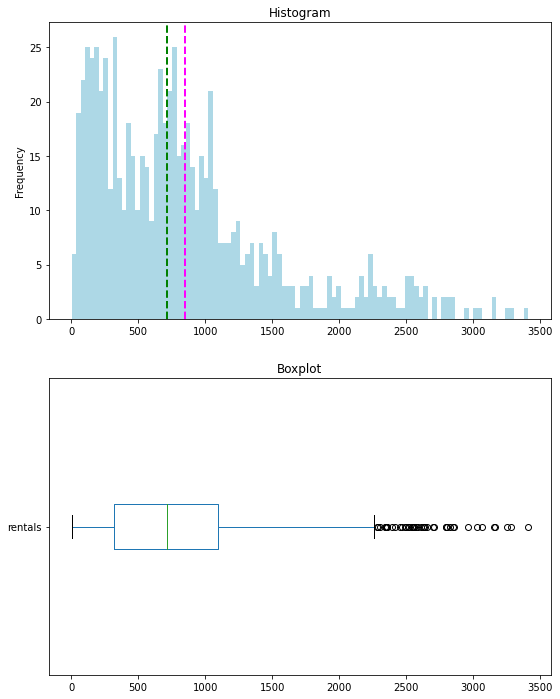

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = bike_data['rentals']

# Create a figure for multiple subplots
fig = plt.figure(figsize=(9,12))

# Plot a histogram
a=fig.add_subplot(2, 1, 1)
label.plot.hist(color='lightblue', bins=100)
# Show the mean and median values on the plot
plt.axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(label.median(), color='green', linestyle='dashed', linewidth=2)
a.set_title('Histogram')

# Plot a Boxplot
a=fig.add_subplot(2, 1, 2)
# create a horizontal box plot somit lines up with the histogram for comparison
label.plot(kind='box', vert=False)
a.set_title('Boxplot')

# Show the plot
plt.show()

we can see the outliers outside the range of 2200


#### Visual Represntation of numeric features

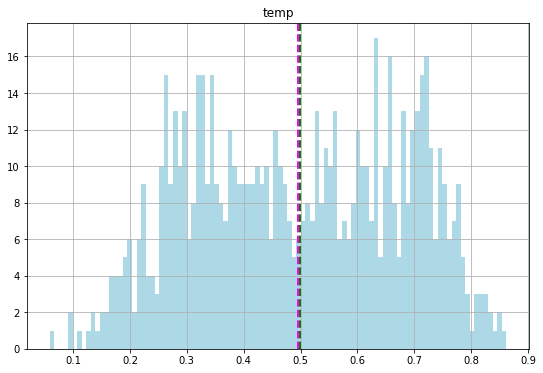

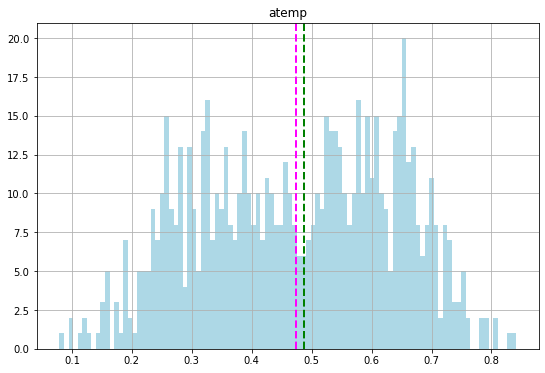

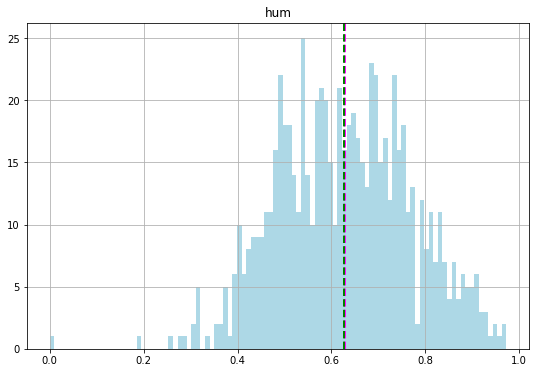

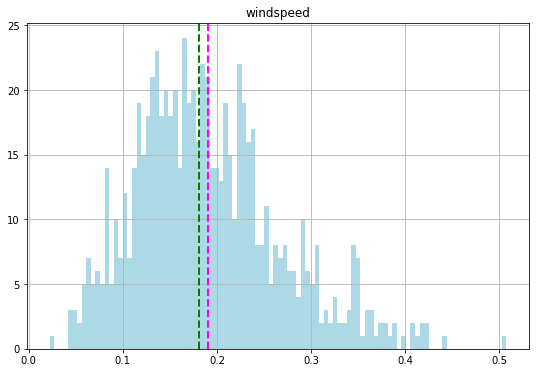

In [18]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(color='lightblue', bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='green', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

#### Visual representation of categorical features

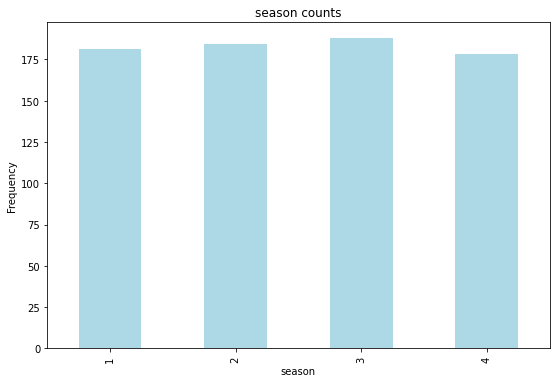

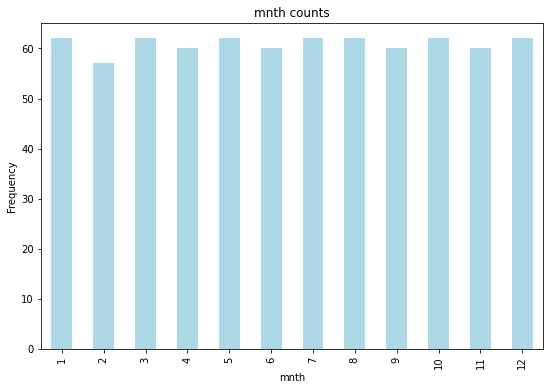

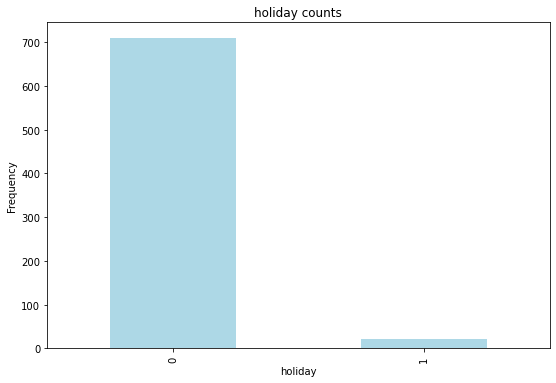

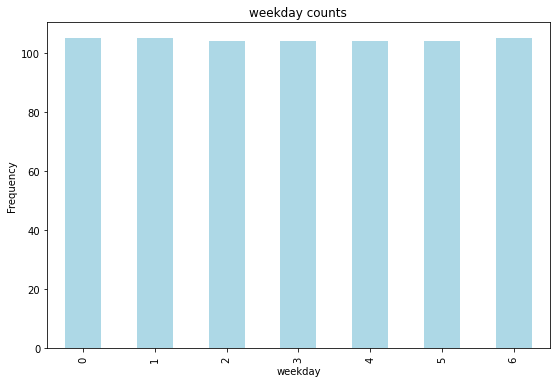

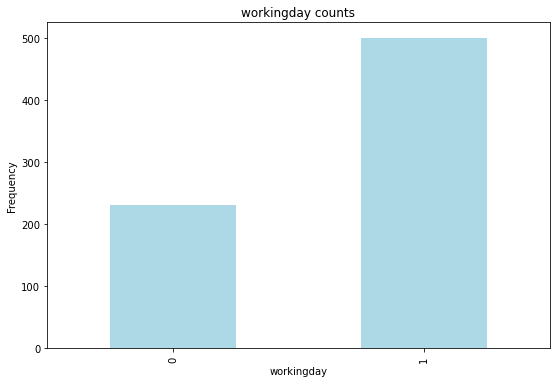

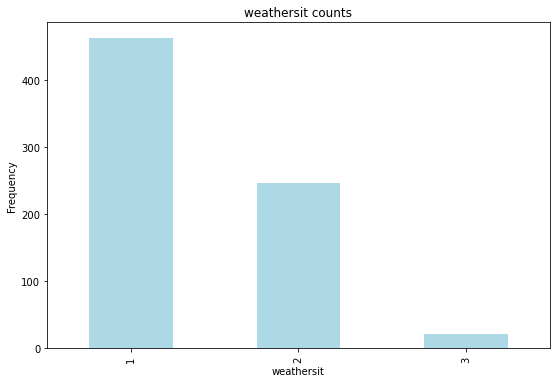

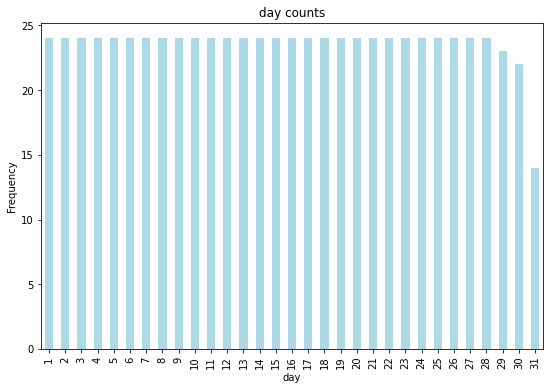

In [19]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='lightblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

Many of the categorical features show a more or less uniform distribution (meaning there's roughly the same number of rows for each category). Exceptions to this include:

* holiday: There are many fewer days that are holidays than days that aren't.
* workingday: There are more working days than non-working days.
* weathersit: Most days are category 1 (clear), with category 2 (mist and cloud) the next most common. There are comaritively few category 3 (light rain or snow) days, and no category 4 (heavy rain, hail, or fog) days at all.
 
Now that we know something about the distribution of the data in our columns, we can start to look for relationships between the features and the rentals label we want to be able to predict.

For the numeric features, we can create scatter plots that show the intersection of feature and label values. We can also calculate the correlation statistic to quantify the apparent relationship..

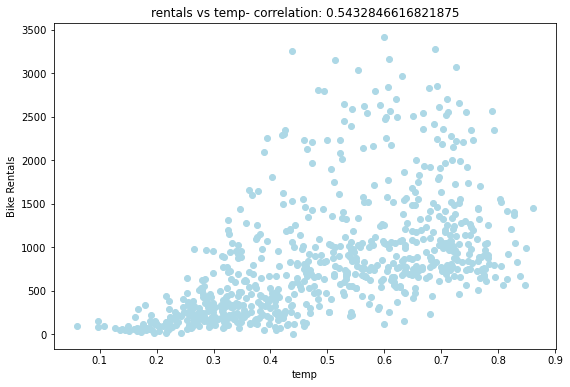

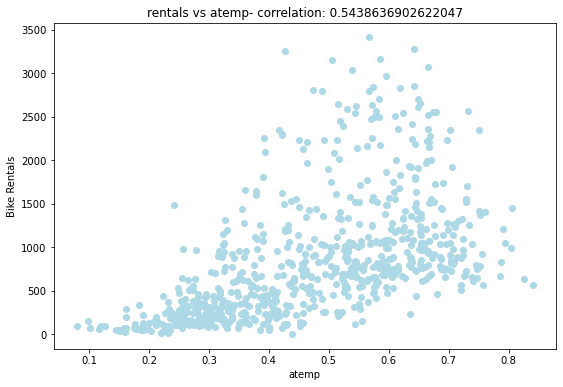

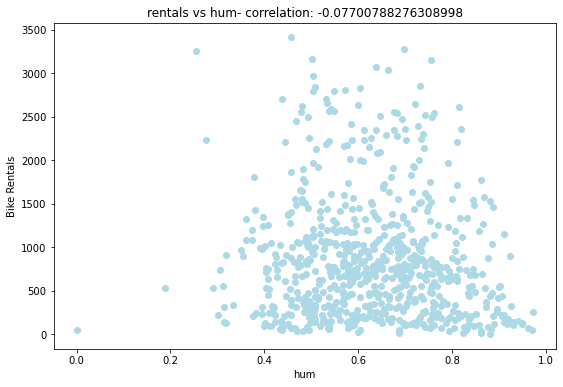

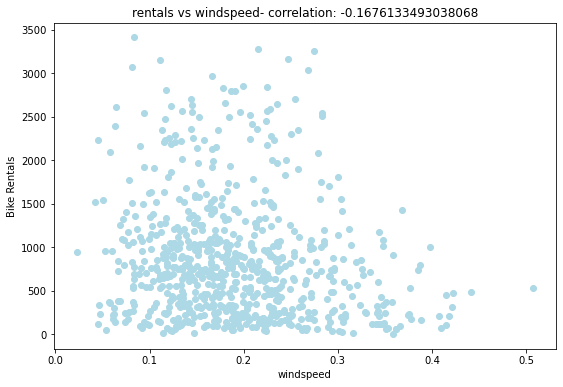

In [21]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label, color='lightblue')
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()

The results aren't conclusive, but if you look closely at the scatter plots for temp and atemp, you can see a vague diagonal trend showing that higher rental counts tend to coincide with higher temperatures; and a correlation value of just over 0.5 for both of these features supports this observation. Conversely, the plots for hum and windspeed show a slightly negative correlation, indicating that there are fewer rentals on days with high humidity or windspeed.

Now let's compare the categorical features to the label. We'll do this by creating box plots that show the distribution of rental counts for each category.

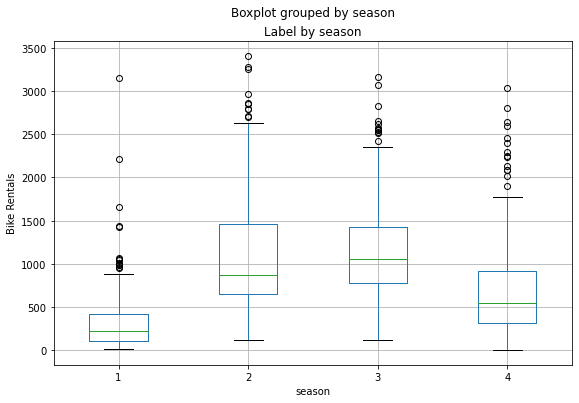

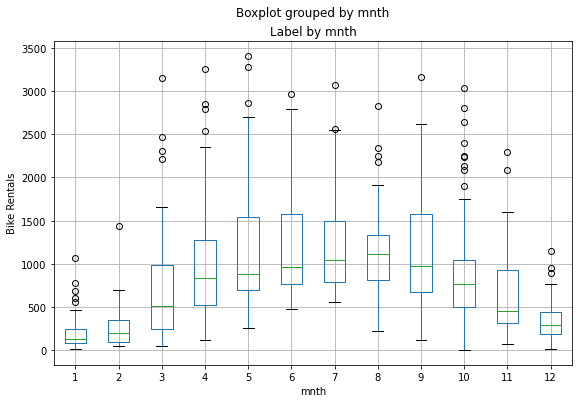

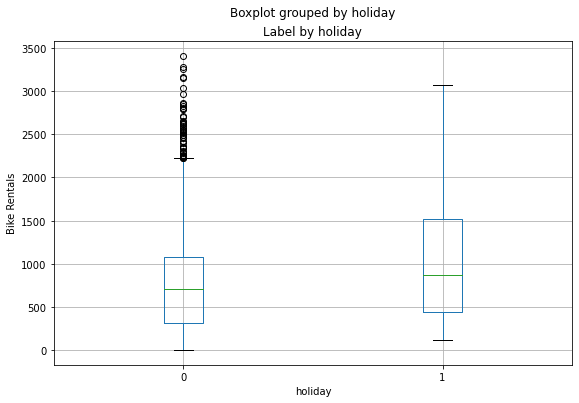

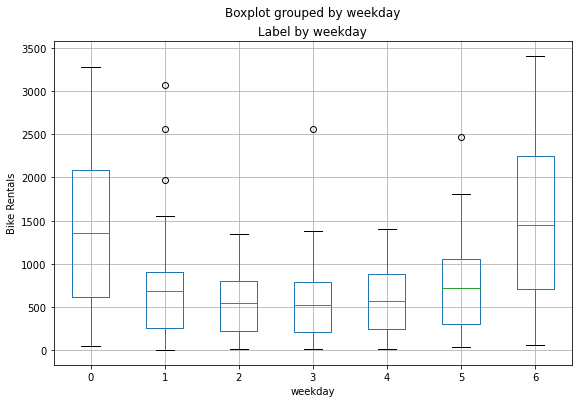

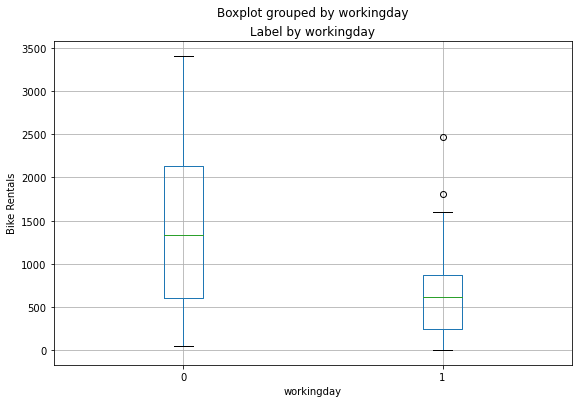

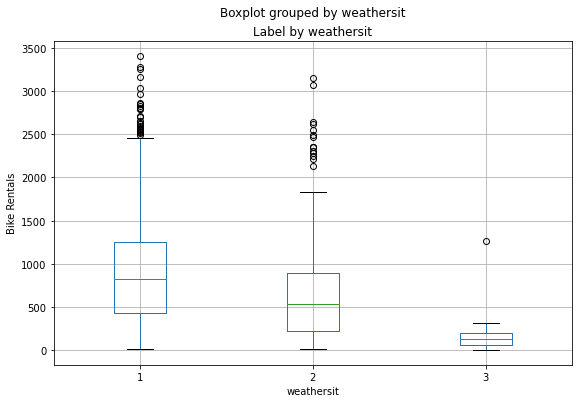

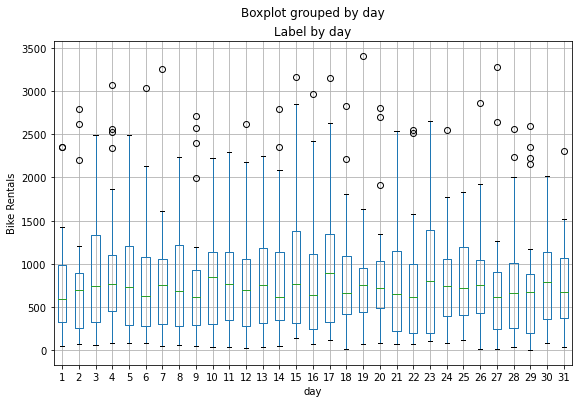

In [22]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

we can see a clear difference in the no. of rentals on a working day and a non working day and a noticeable difference between summer and fall month as compared to winter and spring months.
However day feature doesn't have an effect on no. of rentals

#### Train a Regression Model

In [23]:
# Separate features and labels
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
np.set_printoptions(edgeitems=10)
np.core.arrayprint._line_width = 1000
np.set_printoptions(suppress=True)
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

After separating the dataset, we now have numpy arrays named X containing the features, and y containing the labels.

#### splitting the data into train and test data set

In [24]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.size, X_test.size))

Training Set: 5110, rows
Test Set: 2200 rows


#### Training the model using linear regression algorithm

In [25]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression(normalize=False).fit(X_train, y_train)
print (model)

LinearRegression()


#### Evaluate the Trained Model

In [26]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


#### Using scatterplot to compare the prediction visually 

We'll also overlay a trend line to get a general sense for how well the predicted labels align with the true labels.

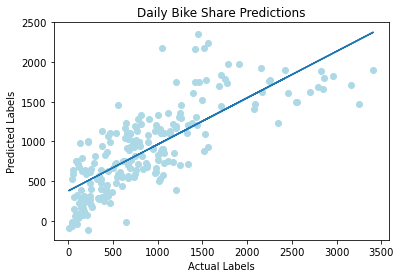

In [27]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions, color="lightblue")
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test))
plt.show()

There's a definite diagonal trend, and the intersections of the predicted and actual values are generally following the path of the trend line; but there's a fair amount of difference between the ideal function represented by the line and the results. This variance represents the residuals of the model - in other words, the difference between the label predicted when the model applies the coefficients it learned during training to the validation data, and the actual value of the validation label. These residuals when evaluated from the validation data indicate the expected level of error when the model is used with new data for which the label is unknown.

You can quantify the residuals by calculating a number of commonly used evaluation metrics. We'll focus on the following three:

* Mean Square Error (MSE): The mean difference between predicted and actual, squared. This yields a relative metric in which the smaller the value, the better the fit of the model
* Root Mean Square Error (RMSE): The square root of the MSE. This yields an absolute metric in the same unit as the label (in this case, numbers of rentals). The smaller the value, the better the model (in a simplistic sense, it represents the average number of rentals by which the predictions are wrong!)
* Coefficient of Determination (usually known as R-squared or R2: A relative metric in which the higher the value, the better the fit of the model.This metric represents how much of the variance between predicted and actual label values the model is able to explain.

#### Using sci-kit learn to calculate the desiredv metrics

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.55947035612
RMSE: 449.4135728595167
R2: 0.6040454736919186


To enhance the predictive power of our model 
#### Preprocess the data

* Scaling numeric feature (to ensure they are on same scale)
* encoding categorical variables
#### using Pipelines to apply these preprocessing transformation

In [29]:
 #Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression(normalize=False))])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', LinearRegression())])


#### Now the model is trained with the preprocessing steps 
let's check how it performs 

Predicted labels:  [1694.  985.  894. -303.  150.  150.  581.  474. 1659.  -77.]
Actual labels:  [2418  754  222   47  244  145  240  555 3252   38]
MSE: 174159.77993961138
RMSE: 417.3245498884668
R2: 0.6585706823305876


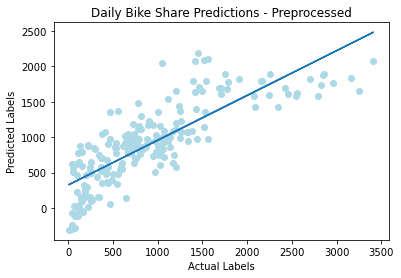

In [30]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels: ' ,y_test[:10])

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, predictions, color='lightblue')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test))
plt.show()

we can see some improvement 
For further improvement let's try a different algorithm

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', GradientBoostingRegressor())])


# train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


MSE: 105942.90767688125
RMSE: 325.48872127445713
R2: 0.7923055788622753


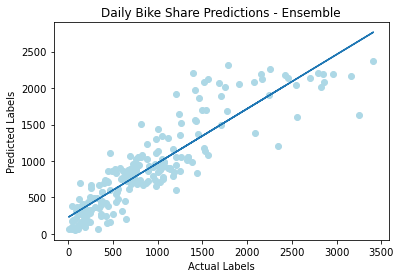

In [32]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, predictions, color='lightblue')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Ensemble')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test))
plt.show()

we can clearly see the improvement

#### Saving the model

In [34]:
import joblib

# Save the model as a pickle file
filename = './bike-share.pkl'
joblib.dump(model, filename)

['./bike-share.pkl']

#### Using the model

In [35]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 122 rentals
